In [1]:
# Import Necessary Libraries

import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
#from nsepy import get_history

In [2]:
sbin=pd.read_csv('AMAZON.csv')

df_close=sbin['Close'].reset_index()

print(sbin.head())
print(sbin.info())



        Date   Close    Open    High     Low    Vol. Change %
0  13-Sep-24  186.95  186.77  188.49  185.93  20.26M   -0.03%
1  12-Sep-24  187.00  184.80  187.41  183.54  33.62M    1.34%
2  11-Sep-24  184.52  180.10  184.99  175.73  42.56M    2.77%
3  10-Sep-24  179.55  177.49  180.50  176.79  36.23M    2.37%
4   9-Sep-24  175.40  174.53  175.85  173.51  29.04M    2.34%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3699 non-null   object 
 1   Close     3699 non-null   float64
 2   Open      3699 non-null   float64
 3   High      3699 non-null   float64
 4   Low       3699 non-null   float64
 5   Vol.      3699 non-null   object 
 6   Change %  3699 non-null   object 
dtypes: float64(4), object(3)
memory usage: 202.4+ KB
None


In [3]:

sbin['Close'] = pd.to_numeric(sbin['Close'])

#sbin['Open'] = pd.to_numeric(sbin['Open'], errors='coerce')
#sbin['High'] = pd.to_numeric(sbin['High'], errors='coerce')

sbin['Date'] = pd.to_datetime(sbin['Date'], errors='coerce')
print(sbin.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3699 non-null   datetime64[ns]
 1   Close     3699 non-null   float64       
 2   Open      3699 non-null   float64       
 3   High      3699 non-null   float64       
 4   Low       3699 non-null   float64       
 5   Vol.      3699 non-null   object        
 6   Change %  3699 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 202.4+ KB
None


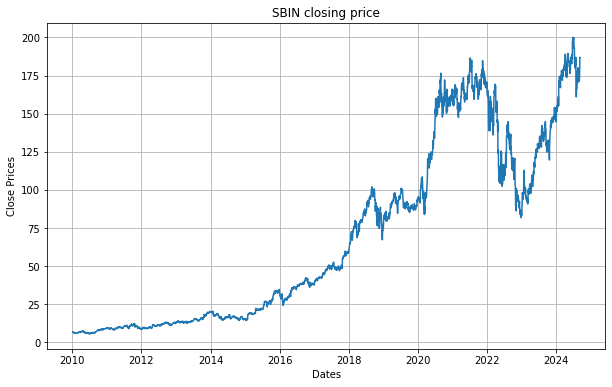

In [4]:
# Plotting Time data

plt.figure(figsize=(10,6))
plt.grid(True)

plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(sbin['Date'],sbin['Close'])
plt.title('SBIN closing price')
plt.show()

In [5]:
# Re-arranging Index

df1=sbin.iloc[::-1]
print(df1.head())
print(df1.shape)
df2=pd.DataFrame(data=df1.values, columns=df1.columns, index=range(0,df1.shape[0]))
print(df2.head())

           Date  Close  Open  High   Low     Vol. Change %
3698 2010-01-04   6.70  6.81  6.83  6.66  152.01M   -0.45%
3697 2010-01-05   6.73  6.67  6.77  6.59  177.13M    0.45%
3696 2010-01-06   6.61  6.73  6.74  6.58  143.62M   -1.78%
3695 2010-01-07   6.50  6.60  6.62  6.44  220.60M   -1.66%
3694 2010-01-08   6.68  6.53  6.68  6.45  196.68M    2.77%
(3699, 7)
        Date Close  Open  High   Low     Vol. Change %
0 2010-01-04   6.7  6.81  6.83  6.66  152.01M   -0.45%
1 2010-01-05  6.73  6.67  6.77  6.59  177.13M    0.45%
2 2010-01-06  6.61  6.73  6.74  6.58  143.62M   -1.78%
3 2010-01-07   6.5   6.6  6.62  6.44  220.60M   -1.66%
4 2010-01-08  6.68  6.53  6.68  6.45  196.68M    2.77%


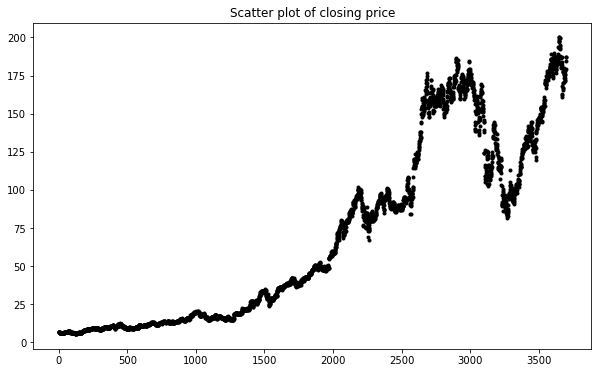

In [6]:
# Scatter Plot of re-arranged indexed dataframe


plt.figure(figsize=(10,6))
df_close = df2['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [7]:
print(df1.describe())

             Close         Open         High          Low
count  3699.000000  3699.000000  3699.000000  3699.000000
mean     68.790078    68.807367    69.595556    67.946629
std      58.754569    58.787934    59.466763    58.040394
min       5.430000     5.300000     5.560000     5.290000
25%      14.835000    14.840000    15.000000    14.650000
50%      47.260000    47.270000    47.510000    46.800000
75%     114.900000   114.325000   116.740000   112.980000
max     200.000000   200.090000   201.200000   199.040000


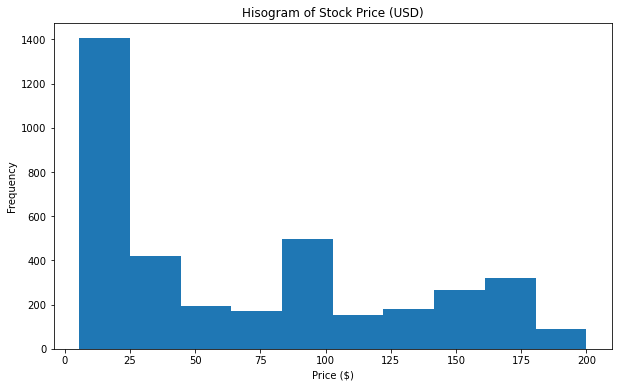

In [8]:
# Histogram of Closing Price of BitCoin

plt.figure(figsize=(10,6))
#df_close = sbin.Close[sbin.Close.index[::-1]].values
df_close.plot(style='k.',kind='hist')
plt.title('Hisogram of Stock Price (USD)')
plt.xlabel('Price ($)')
plt.show()

Neural Network

In [9]:
# import libraries

import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
import os
from pandas_datareader import data as pdr
import yfinance as yf

#plt.style.use('fivethirtyeight')

In [10]:
# Selecting data points as the paper

idxs=df2.index[df2['Date']=='2011-01-05'].values
#print(idxs, df2.Close[idxs])
#print(idxs)
idxn=df2.index[df2['Date']=='2019-12-31'].values
#print('ddd',idxn)

dataT=df2.filter(['Close'])  # Total dataset

data=dataT[int(idxs):int(idxn)]  # Dataset equal to the paper

#print(data)
dataset=data.values
#print('dataset = ', dataset)


In [11]:
print(data.describe())
print(data.info())


print('mean =',data.Close.mean())

print('min =',data.Close.min())
print('max =',data.Close.max())
print('std =',data.Close.std())
print('skew =',data.Close.skew())
print('kurt =',data.Close.kurt())

from statsmodels.tsa.stattools import adfuller, kpss

print('Adf test :Ho: Non-Stationary, H1: Stationary \n',adfuller(dataset))
#H0: Non-Stationary
#H1: stationary
print('KPSS test : Ho: Stationary, H1: Not Stationary   \n',kpss(dataset))
#H0: Stationary
#H1: Non-stationary
from scipy.stats import norm, kurtosis, skew, shapiro, normaltest

# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
print('Shapiro Test: Ho: Data frm Normal Dist \n', shapiro(dataset))
#print(normaltest(dataset))

#H0: data from normal distribution
#H1: data not from normal distribution    

print('kurtosis: ',kurtosis(dataset))
#print(skew(dataT))

          Close
count   2261.00
unique  1723.00
top       11.15
freq       6.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 254 to 2514
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2261 non-null   object
dtypes: object(1)
memory usage: 17.8+ KB
None
mean = 36.799208314904924
min = 8.05
max = 101.98
std = 29.082754202165532
skew = 0.9003863231113535
kurt = -0.6642125633931149
Adf test :Ho: Non-Stationary, H1: Stationary 
 (0.5486558766795646, 0.9862792836051077, 26, 2234, {'1%': -3.4332805415364724, '5%': -2.8628346299364282, '10%': -2.5674591931002038}, 5521.205370509915)
KPSS test : Ho: Stationary, H1: Not Stationary   
 (6.6851957283330234, 0.01, 29, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Shapiro Test: Ho: Data frm Normal Dist 
 ShapiroResult(statistic=0.8211620450019836, pvalue=1.1210387714598537e-44)
kurtosis:  [-0.6653971456131687]


<ipython-input-11-aacbb9be3054>:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print('KPSS test : Ho: Stationary, H1: Not Stationary   \n',kpss(dataset))


In [12]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

#print(scaled_data)

In [13]:
# Create the training dataset


#training_data_len=math.ceil(len(dataset)* 0.8)
training_data_len=math.ceil(len(dataset)* 0.7)

print(training_data_len)



train_data=scaled_data[0:training_data_len,:]

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    #if i <=61:
        #print(x_train)
        #print(y_train)

        
# create Test dataset


        
test_data=scaled_data[training_data_len -60: , :]

x_test=[]
y_test= dataset [training_data_len:, :]



for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

1583


In [14]:
print(data.head())
print(data.info())
print(data.describe())

    Close
254  9.37
255  9.29
256  9.27
257  9.23
258  9.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 254 to 2514
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2261 non-null   object
dtypes: object(1)
memory usage: 17.8+ KB
None
          Close
count   2261.00
unique  1723.00
top       11.15
freq       6.00


In [15]:
#convert x_train and y_train to numpy array


x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)


# convert data to numpy array 

x_test= np.array(x_test)
print(x_test.shape)



(1523, 60)
(678, 60)


In [127]:
#reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
print(x_train.shape)


x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
print(x_test.shape)



(1523, 60, 1)
(678, 60, 1)


In [128]:
print(y_test)

[[44.93]
 [45.37]
 [45.38]
 [45.46]
 [45.92]
 [46.25]
 [47.41]
 [47.35]
 [47.05]
 [46.88]
 [46.71]
 [47.45]
 [47.64]
 [47.45]
 [47.38]
 [48.07]
 [47.9]
 [48.3]
 [47.24]
 [47.92]
 [47.99]
 [48.53]
 [48.58]
 [49.02]
 [49.67]
 [49.79]
 [49.84]
 [49.73]
 [49.8]
 [50.34]
 [50.57]
 [50.15]
 [50.5]
 [50.51]
 [48.92]
 [48.25]
 [49.04]
 [48.82]
 [48.21]
 [49.39]
 [49.76]
 [49.63]
 [50.11]
 [50.06]
 [50.19]
 [49.7]
 [48.84]
 [49.52]
 [48.8]
 [48.4]
 [47.68]
 [48.57]
 [48.26]
 [48.94]
 [49.82]
 [49.71]
 [50.33]
 [50.03]
 [50.09]
 [50.5]
 [51.22]
 [51.34]
 [51.44]
 [51.28]
 [51.95]
 [51.99]
 [52.64]
 [52.3]
 [51.0]
 [49.39]
 [49.81]
 [49.79]
 [49.35]
 [49.38]
 [49.61]
 [49.49]
 [49.1]
 [47.85]
 [48.4]
 [49.16]
 [49.14]
 [48.91]
 [48.03]
 [47.92]
 [47.66]
 [48.34]
 [47.9]
 [47.62]
 [47.26]
 [47.3]
 [47.7]
 [48.38]
 [49.03]
 [48.91]
 [48.26]
 [48.39]
 [48.97]
 [48.3]
 [48.9]
 [49.13]
 [49.98]
 [49.61]
 [49.34]
 [48.71]
 [48.49]
 [48.66]
 [48.23]
 [47.76]
 [46.99]
 [46.93]
 [47.54]
 [47.82]
 [48.07]


# Model Create and train 

In [129]:
# LSTM-Attention-Dense


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D, Reshape
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt



# Transformer Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

# Model Definition
inputs = Input(shape=(x_train.shape[1], x_train.shape[2]))
x = LSTM(60, return_sequences = True, input_shape = (60,1))(inputs)
x = LSTM(60, return_sequences = False)(x)
x = Reshape((60,1))(x)
x = Dropout(0.1)(x)
x = transformer_encoder(x, head_size=120, num_heads=5, ff_dim=5, dropout=0.15)
x = GlobalAveragePooling1D(data_format='channels_first')(x)
x = Dropout(0.1)(x)
x = Dense(30, activation="relu")(x)
outputs = Dense(1, activation="linear")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="mean_squared_error")

# Model Summary
model.summary()


model.fit(x_train, y_train,  epochs=12, batch_size=1, verbose=1)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 lstm_2 (LSTM)                  (None, 60, 60)       14880       ['input_2[0][0]']                
                                                                                                  
 lstm_3 (LSTM)                  (None, 60)           29040       ['lstm_2[0][0]']                 
                                                                                                  
 reshape_1 (Reshape)            (None, 60, 1)        0           ['lstm_3[0][0]']                 
                                                                                            

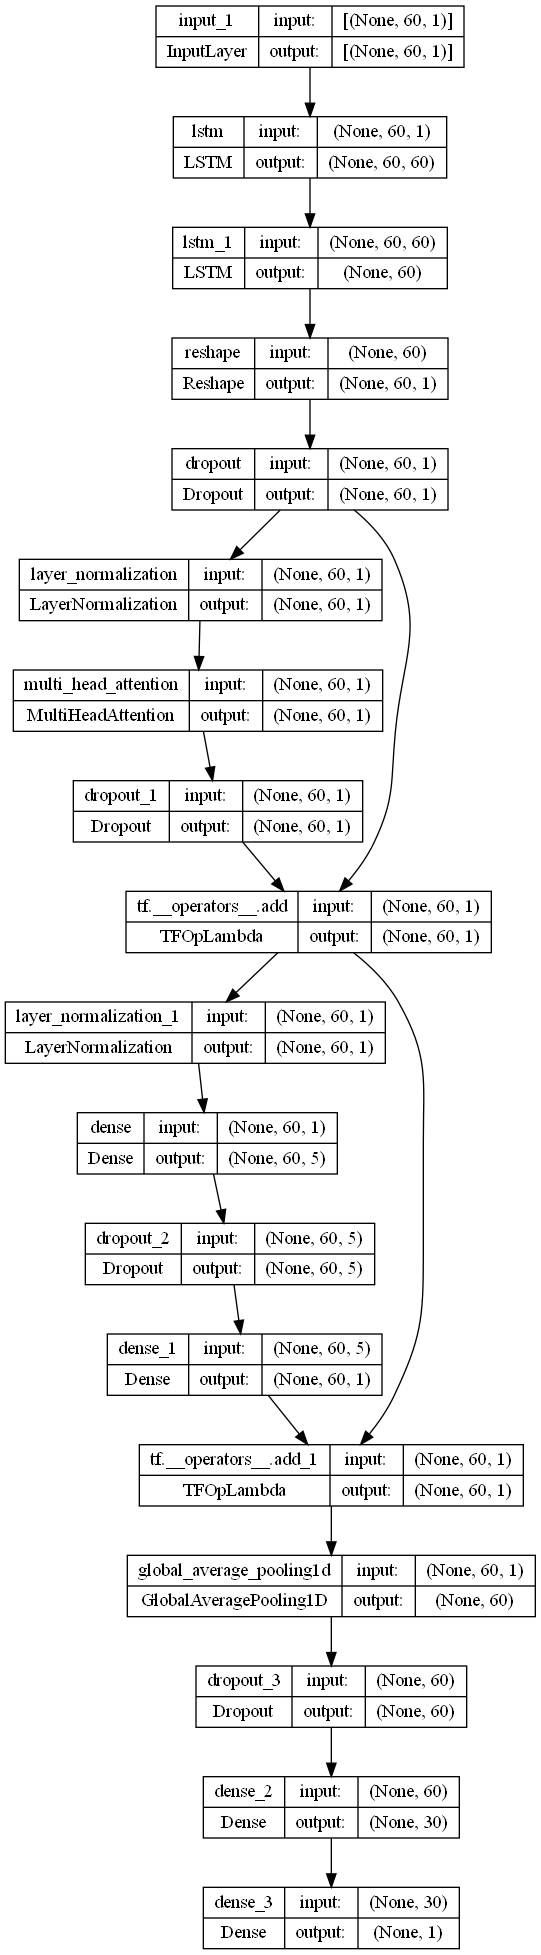

In [18]:
import keras

keras.utils.plot_model(model, "ensemble_model.png", show_shapes=True)

In [31]:
# More Training (if Required)

model.fit(x_train, y_train, batch_size=1, epochs=5)



Epoch 1/5
1749/1749 [==============================] - 21s 12ms/step - loss: 4.5930e-04
Epoch 2/5
1749/1749 [==============================] - 22s 12ms/step - loss: 3.3946e-04
Epoch 3/5
1749/1749 [==============================] - 22s 12ms/step - loss: 3.4989e-04
Epoch 4/5
1749/1749 [==============================] - 21s 12ms/step - loss: 2.9810e-04
Epoch 5/5
1749/1749 [==============================] - 22s 13ms/step - loss: 3.1880e-04


In [45]:
# More Training (if Required)

model.fit(x_train, y_train, batch_size=1, epochs=5)


Epoch 1/5
1749/1749 [==============================] - 19s 11ms/step - loss: 3.0435e-04
Epoch 2/5
1749/1749 [==============================] - 22s 13ms/step - loss: 2.9047e-04
Epoch 3/5
1749/1749 [==============================] - 22s 12ms/step - loss: 2.5793e-04
Epoch 4/5
1749/1749 [==============================] - 22s 13ms/step - loss: 2.8266e-04
Epoch 5/5
1749/1749 [==============================] - 22s 13ms/step - loss: 2.3646e-04


In [132]:
# More Training (if Required)

model.fit(x_train, y_train, batch_size=1, epochs=10)


Epoch 1/10
1523/1523 [==============================] - 18s 12ms/step - loss: 1.5257e-04
Epoch 2/10
1523/1523 [==============================] - 18s 12ms/step - loss: 1.2674e-04
Epoch 3/10
1523/1523 [==============================] - 18s 12ms/step - loss: 1.2960e-04
Epoch 4/10
1523/1523 [==============================] - 18s 12ms/step - loss: 1.3094e-04
Epoch 5/10
1523/1523 [==============================] - 19s 12ms/step - loss: 1.3471e-04
Epoch 6/10
1523/1523 [==============================] - 21s 14ms/step - loss: 1.1403e-04
Epoch 7/10
1523/1523 [==============================] - 20s 13ms/step - loss: 1.1549e-04
Epoch 8/10
1523/1523 [==============================] - 22s 14ms/step - loss: 1.3135e-04
Epoch 9/10
1523/1523 [==============================] - 20s 13ms/step - loss: 1.1106e-04
Epoch 10/10
1523/1523 [==============================] - 20s 13ms/step - loss: 1.1097e-04


In [149]:
# More Training (if Required)

model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
1523/1523 [==============================] - 21s 14ms/step - loss: 1.2251e-04
Epoch 2/3
1523/1523 [==============================] - 20s 13ms/step - loss: 1.2346e-04
Epoch 3/3
1523/1523 [==============================] - 20s 13ms/step - loss: 9.5623e-05


In [150]:
# Get the models predicted price values

predictions = model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



22/22 [==============================] - 1s 26ms/step
(678, 1)


In [151]:
#Get the root mean squared error (RMSE) 
rmse= np.sqrt( np.mean((predictions - y_test)**2))
print('Root Mean Square Error',rmse)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Calculate test metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

r2 = r2_score(y_test , predictions)
evs = explained_variance_score(y_test, predictions)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mpe = np.mean((y_test - predictions) / y_test) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root-Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

Root Mean Square Error 4.578130922529579
Mean Squared Error (MSE): 20.959282743821515
Root-Mean Squared Error (RMSE): 4.578130922529577
Mean Absolute Error (MAE): 3.9012092853647418
R2 Score: 0.9280854218652469
Explained Variance Score: 0.9584726858962478
Mean Absolute Percentage Error (MAPE): 4.753409985062969
Mean Percentage Error (MPE): 2.9694912919515337


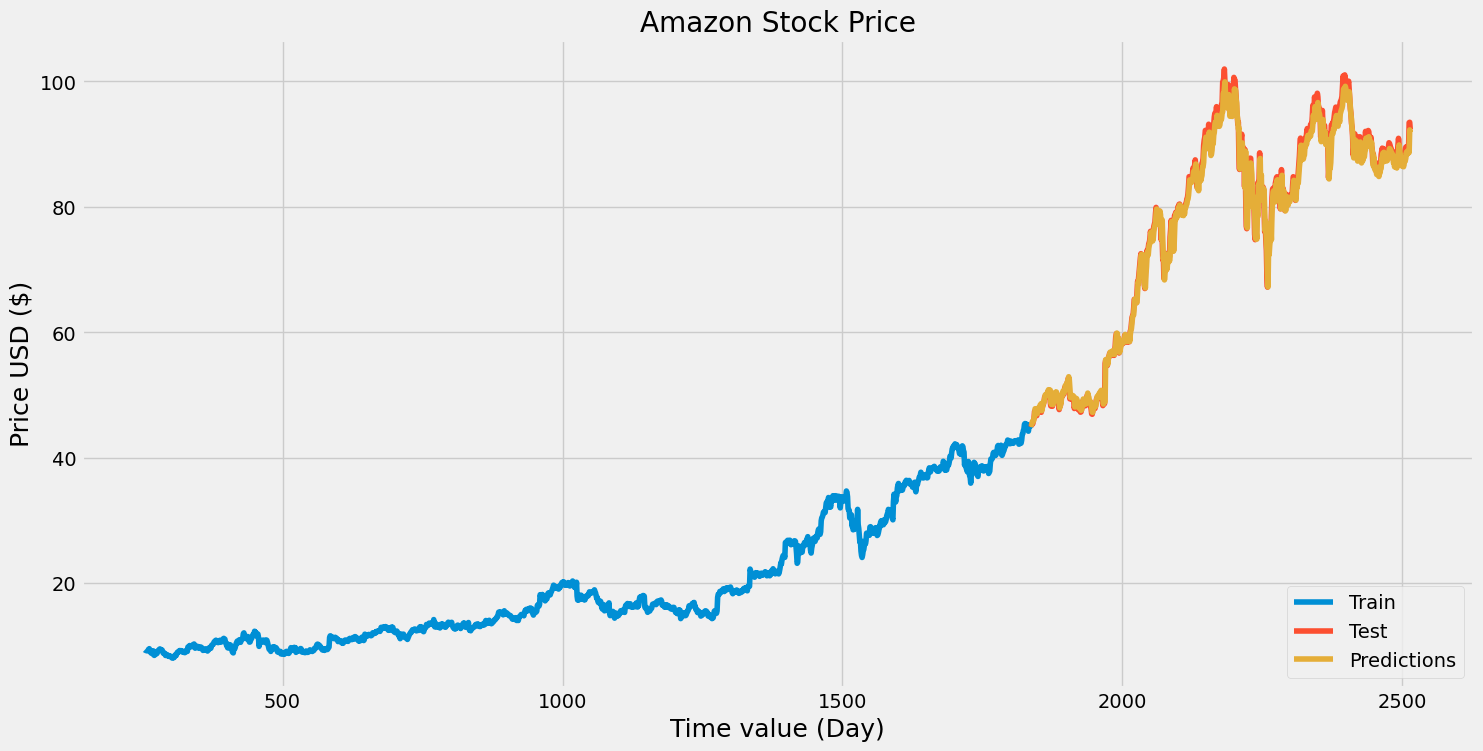

In [135]:
#plot the data

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Amazon Stock Price')
plt.xlabel('Time value (Day)', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
#plt.plot(sbin['Date'][int(idxs):int(idxn)],data['Close'])
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Test', 'Predictions'], loc = 'lower right')

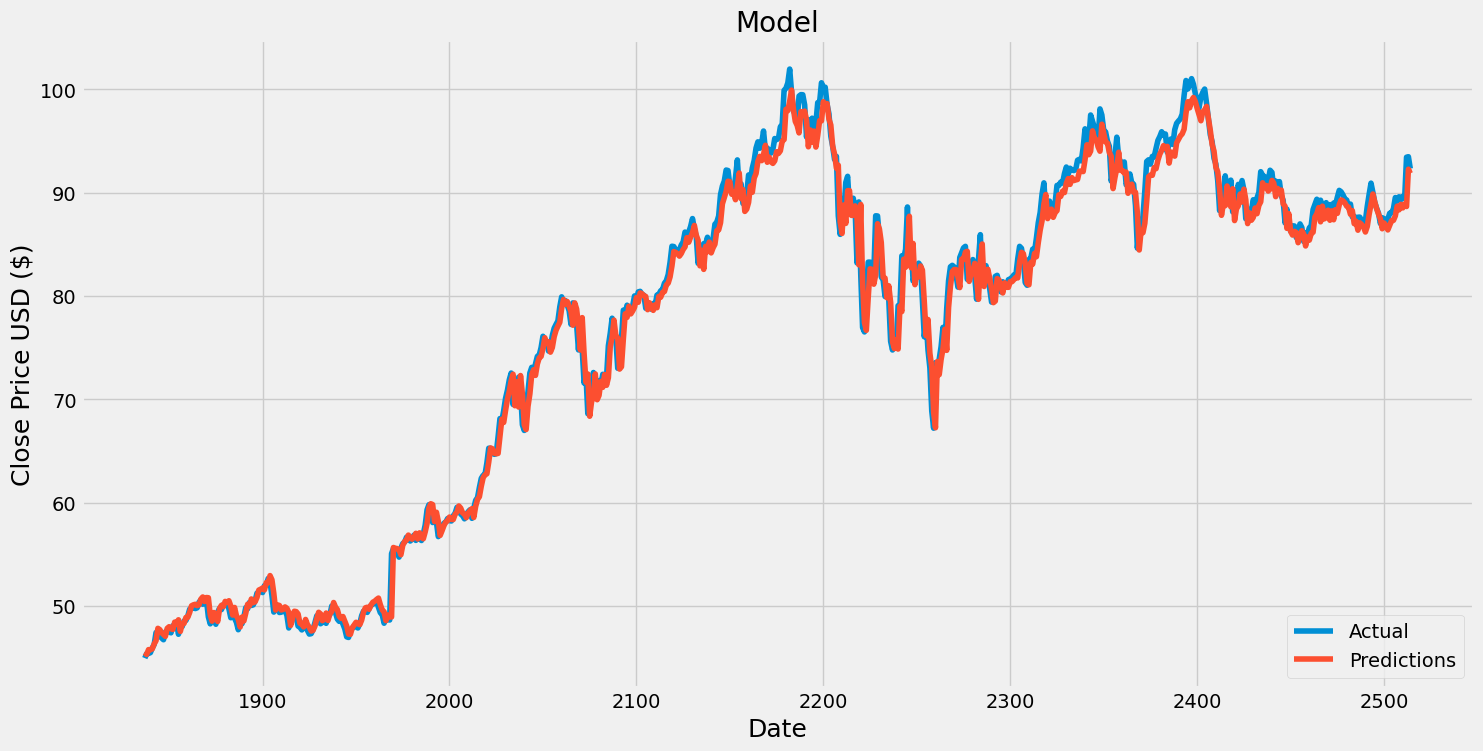

In [136]:
#plot the data

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual', 'Predictions'], loc = 'lower right')

1.9252183417291973


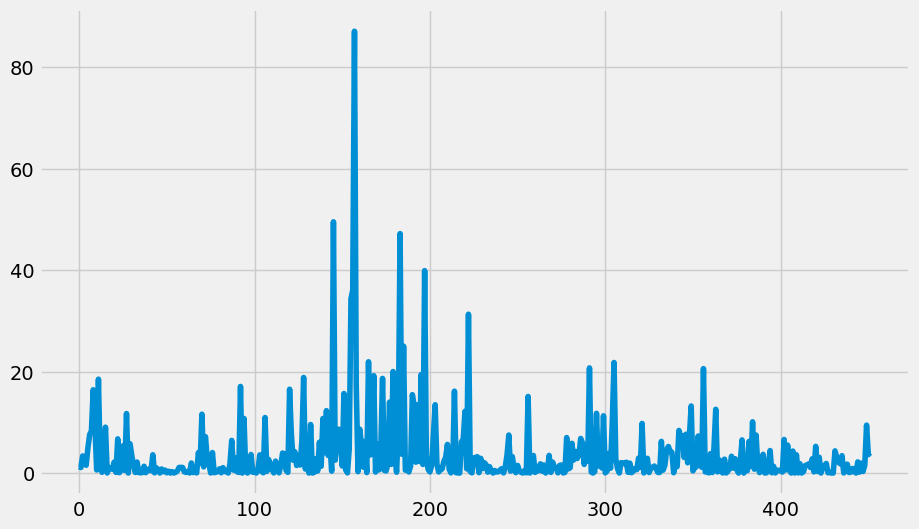

In [86]:
error=((y_test-predictions)**2)
plt.plot(error)

print(np.sqrt(np.sum(error)/len(error)))

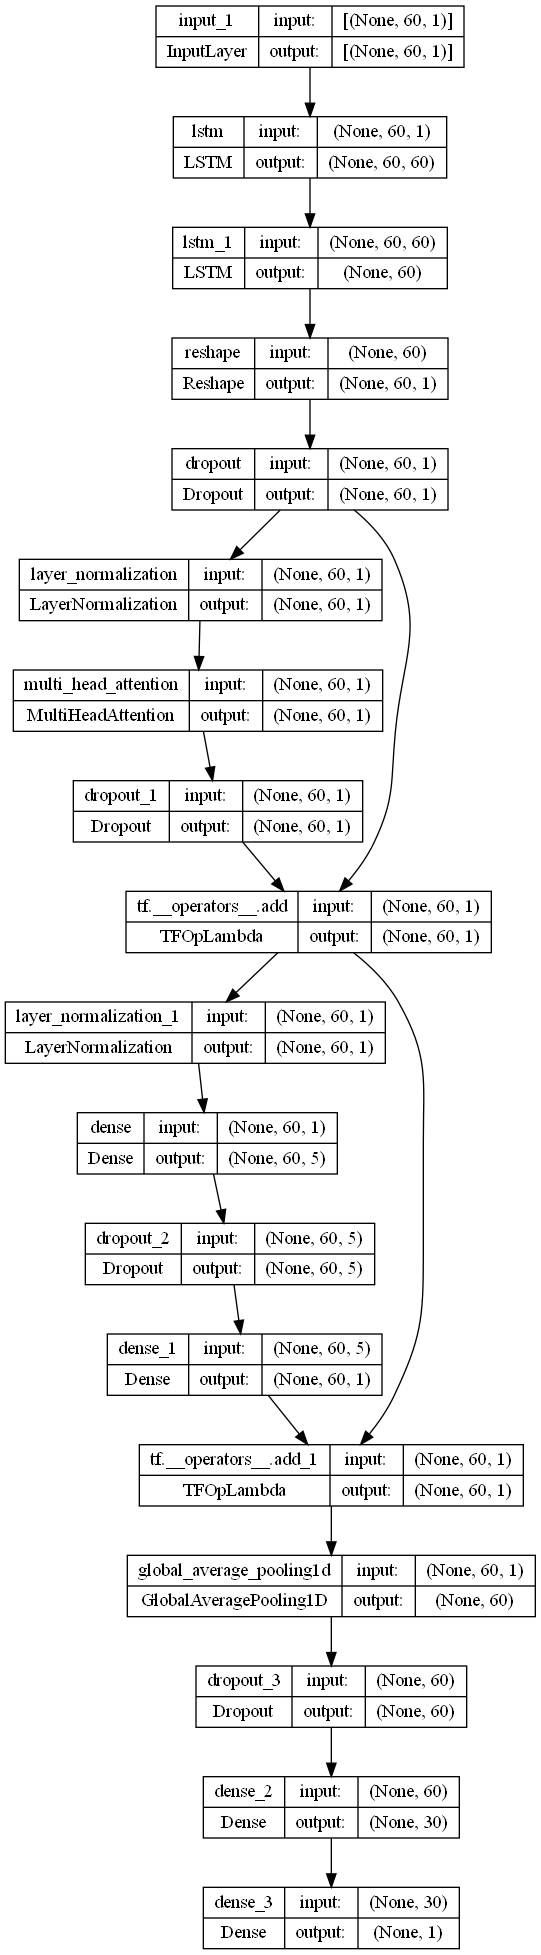

In [23]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#keras.utils.plot_model(model1, "Model1.png", show_shapes=True)
#keras.utils.plot_model(model2, "Model2.png", show_shapes=True)

# Model and session save

In [137]:
import dill                            #pip install dill --user
import keras

# Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
model.save("AMAZON_LSTMTransformer_model_rmse_1.54.keras")

filename = 'AMAZON_LSTMTransformer_modelrmse_1.54.pkl'
dill.dump_session(filename)



# It can be used to reconstruct the model identically.
#reconstructed_model = keras.models.load_model("LSTM_model.keras")
#model = keras.models.load_model('LSTM_model.keras')
# Let's check:
#np.testing.assert_allclose(
#    model.predict(test_input), reconstructed_model.predict(test_input)
#)

INFO:tensorflow:Assets written to: ram://b40ee8dc-a5a0-46ff-84cf-66957966c482/assets


INFO:tensorflow:Assets written to: ram://b40ee8dc-a5a0-46ff-84cf-66957966c482/assets


INFO:tensorflow:Assets written to: ram://069c5ba6-d328-4bba-9845-5e3022895194/assets


INFO:tensorflow:Assets written to: ram://069c5ba6-d328-4bba-9845-5e3022895194/assets


TypeError: cannot pickle 'tensorflow.python.framework._pywrap_python_api_dispatcher.PythonAPIDispatcher' object

In [139]:
## Saving as pickle file


import pickle

# save the iris classification model as a pickle file
model_pkl_file = "AMAZON_LSTMTransformerHybrid_rmse_1.54.pkl"  
data_pkl_file = "Amazon_data.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

with open(data_pkl_file, 'wb') as file:  
    pickle.dump(data, file)

INFO:tensorflow:Assets written to: ram://fbbfe242-9cb8-4bd2-81d2-5b48f3b1bf0f/assets


INFO:tensorflow:Assets written to: ram://fbbfe242-9cb8-4bd2-81d2-5b48f3b1bf0f/assets


# Saved Model Load from Disk

In [145]:
# load model from keras file


import numpy as np
import keras
import dill                            #pip install dill --user


#filename = 'globalsave_LSTM.pkl'

#dill.load_session(filename)

reconstructed_model = keras.models.load_model("AMAZON_LSTMTransformer_model_rmse_1.54.keras")




# Let's check:
np.testing.assert_allclose(
    reconstructed_model.predict(x_test), reconstructed_model.predict(x_test)
)


22/22 [==============================] - 1s 24ms/step


In [143]:
import pickle

model_pkl_file = "AMAZON_LSTMTransformerHybrid_rmse_1.54.pkl" 

data_pkl_file = "Amazon_data.pkl"


with open(model_pkl_file, 'rb') as file:  
    reconstructed_model = pickle.load(file)

with open(data_pkl_file, 'rb') as file:  
    data = pickle.load(file)


        
# evaluate model 
y_predict = reconstructed_model.predict(x_test)

# check results
#print(classification_report(y_test, y_predict)) 

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://0f8c5a59-f1cd-4c94-aeb5-795f07869e0a/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [146]:
reconstructed_model.summary()



predictions = reconstructed_model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)


rmse= np.sqrt( np.mean((predictions - y_test)**2))
print('Root Mean Square Error',rmse)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 lstm_2 (LSTM)                  (None, 60, 60)       14880       ['input_2[0][0]']                
                                                                                                  
 lstm_3 (LSTM)                  (None, 60)           29040       ['lstm_2[0][0]']                 
                                                                                                  
 reshape_1 (Reshape)            (None, 60, 1)        0           ['lstm_3[0][0]']                 
                                                                                            

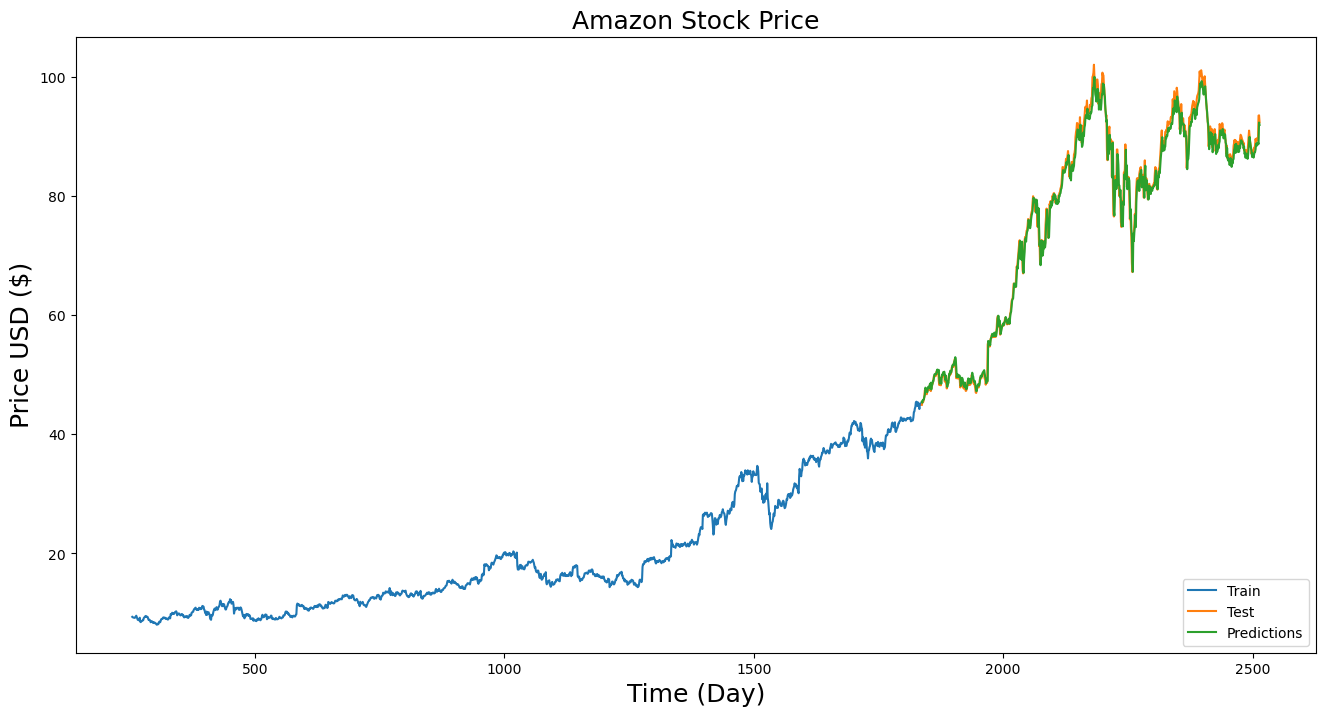

In [148]:
#plot the data
plt.style.use('default')

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Amazon Stock Price', fontsize=18)
plt.xlabel('Time (Day)', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Test', 'Predictions'], loc = 'lower right')

In [17]:
#reconstructed_model = keras.models.load_model(
#    "LSTM_model.keras",
#    custom_objects={"CustomLayer": CustomLayer, "custom_fn": custom_fn},
#)

# Test Dataset!

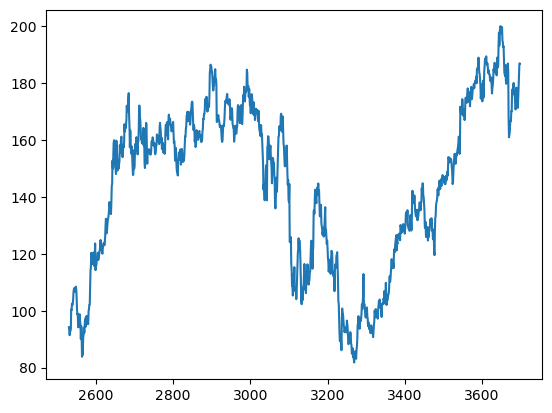

In [103]:
idxs=df2.index[df2['Date']=='2011-01-06'].values
#print(idxs, df2.Close[idxs])
#print(idxs)
idxn=df2.index[df2['Date']=='2020-01-23'].values
#print('ddd',idxn)

dataT=df2.filter(['Close'])  # Total dataset

data_new=dataT[int(idxn):]  # Dataset equal to the paper

#print(data)
#dataset=data.values
#print('dataset = ', dataset)
plt.plot(data_new)

(1282, 1)
[[0.02911256]
 [0.02766572]
 [0.03128716]
 ...
 [0.6128784 ]
 [0.64481324]
 [0.64832326]]
(1222, 60)


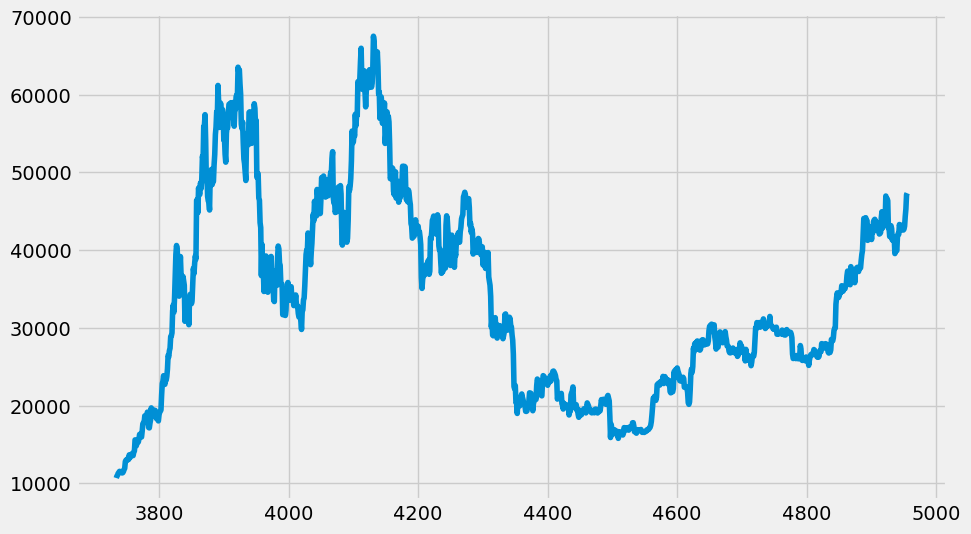

In [62]:
##############################  TEST #######################



idxn=df2.index[df2['Date']=='2020-01-23'].values
#print('ddd',idxn)

dataT=df2.filter(['Close'])  # Total dataset

data_new=dataT[int(idxn):]  # Dataset after the date 23/01/2020


### or

data_new=dataT[3674:]

#data_new=dataT[2584:]


print(data_new.shape)




scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_new=scaler.fit_transform(data_new)
#y_test= dataset [training_data_len:, :]
test_data_new=scaled_data_new
print(scaled_data_new)


x_test=[]
y_test= data_new[60:]


for i in range (60, len(test_data_new)):
    x_test.append(test_data_new[i-60:i,0])

x_test= np.array(x_test)

print(x_test.shape)

x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

    
plt.plot(y_test)
#print(x_test)
#print(y_test)


In [56]:
# if loaded from saved model 
predictions = reconstructed_model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



NameError: name 'reconstructed_model' is not defined

In [63]:
predictions = model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



39/39 [==============================] - 1s 19ms/step
(1222, 1)


In [64]:
#Get the root mean squared error (RMSE) 

rmse= np.sqrt( np.mean((predictions - y_test)**2))
rmse


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Calculate test metrics
mse = mean_squared_error(y_test.values, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test.values, predictions)

r2 = r2_score(y_test.values, predictions)
evs = explained_variance_score(y_test.values, predictions)

mape = np.mean(np.abs((y_test.values, predictions) / y_test.values)) * 100
mpe = np.mean((y_test.values, predictions) / y_test.values) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root-Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

Mean Squared Error (MSE): 3909887.937387717
Root-Mean Squared Error (RMSE): 1977.343656875991
Mean Absolute Error (MAE): 1464.8941778654357
R2 Score: 0.9763955571307659
Explained Variance Score: 0.9838587417157209
Mean Absolute Percentage Error (MAPE): 98.53316486342224
Mean Percentage Error (MPE): 98.53316486342224


In [65]:
print(predictions.shape)

(1222, 1)


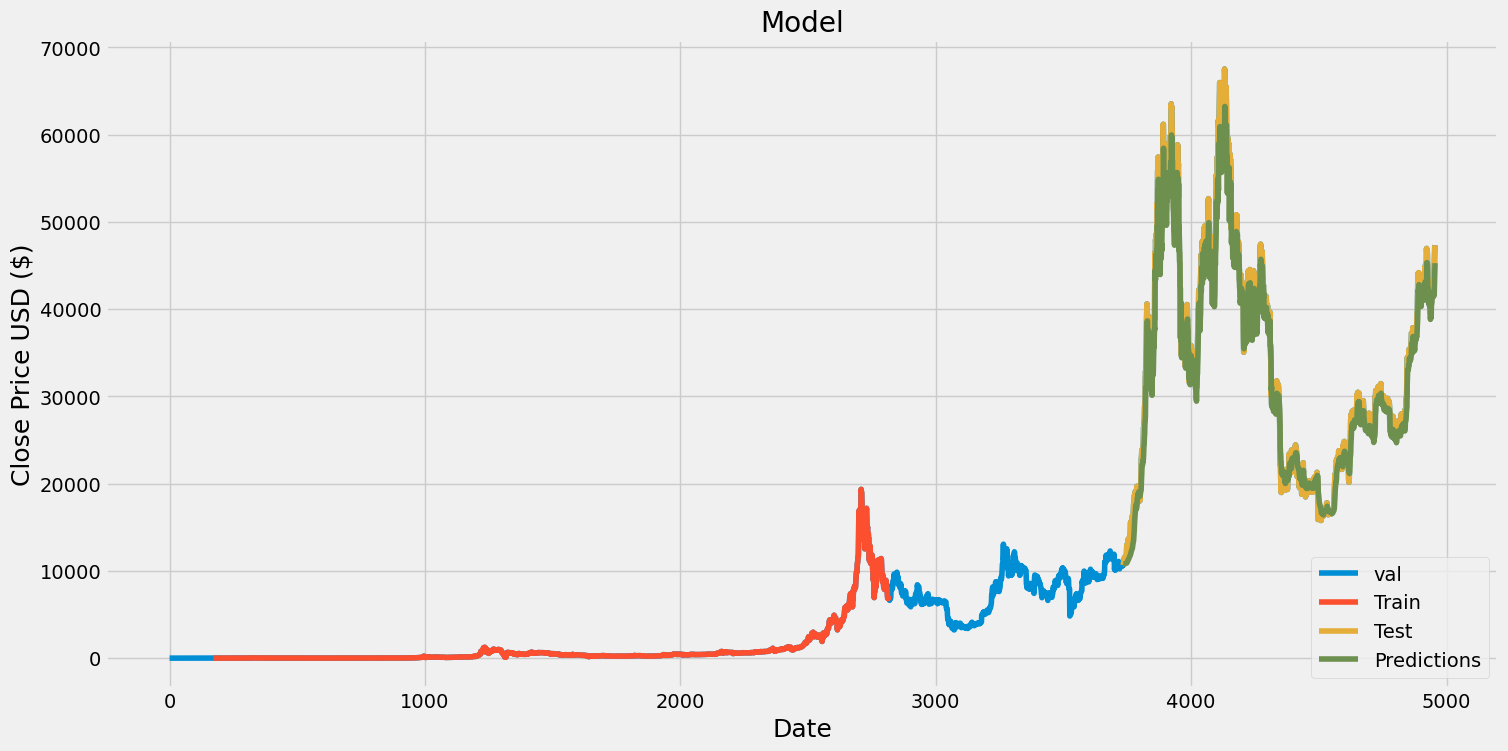

In [67]:
#train=data[:training_data_len]
#valid = data[training_data_len:]
#valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(dataT)
plt.plot(train)
#plt.plot(y_test.values)
plt.plot(y_test)
plt.plot(y_test.index, predictions)

#plt.plot(train['Close'])
#plt.plot(valid[['Close', 'Predictions']])
plt.legend(['val','Train', 'Test', 'Predictions'], loc = 'lower right')

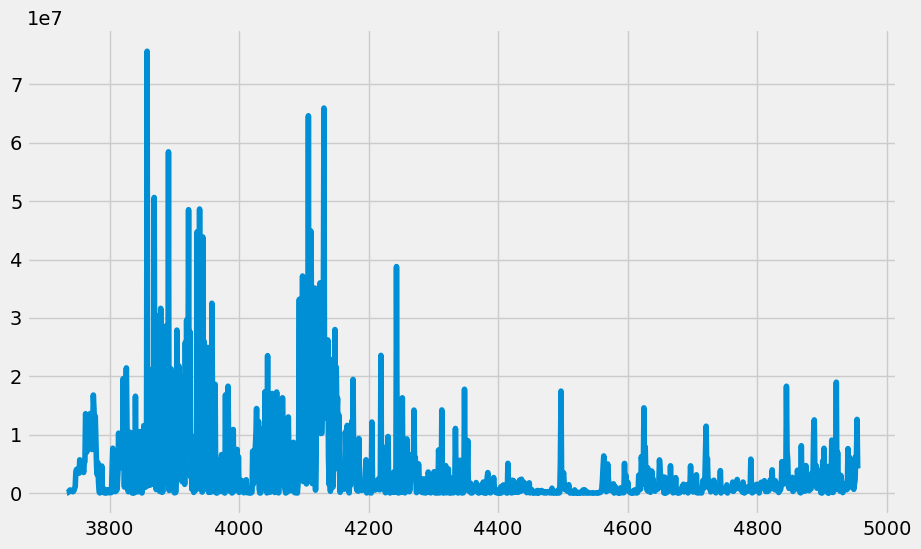

In [112]:
error=((y_test-predictions)**2)
plt.plot(error)

#rmse= np.sqrt(np.sum(error)/len(error))
#print(rmse)

In [70]:
import yfinance as yf

In [74]:
bitcoin = yf.download("BTC-USD", start="2011-01-06", end="2024-4-21")

[*********************100%%**********************]  1 of 1 completed


[1522]
[4955]
[3433]


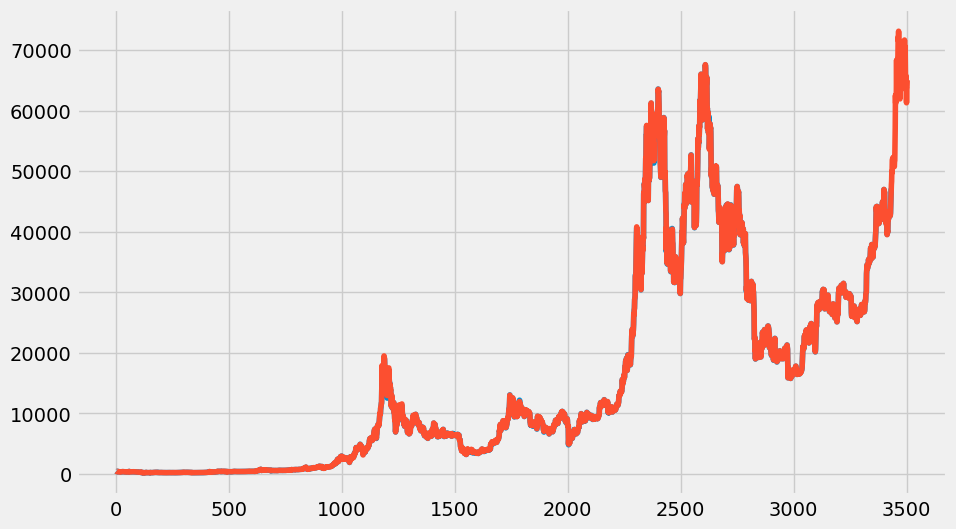

In [110]:
bitcoin_close = bitcoin['Close'].reset_index()


idxs=df2.index[df2['Date']=='2014-09-17'].values
print(idxs)

idxn=df2.index[df2['Date']=='2024-02-10'].values
print(idxn)



idxp=bitcoin_close.index[bitcoin_close['Date']=='2024-02-10'].values
print(idxp)


plt.plot(bitcoin_close['Close'][0:int(idxp)].index, df2['Close'][int(idxs):int(idxn)])
plt.plot(bitcoin_close['Close'].index, bitcoin_close['Close'].values)

In [93]:
print(bitcoin_close)
print(df2)

           Date         Close
0    2014-09-17    457.334015
1    2014-09-18    424.440002
2    2014-09-19    394.795990
3    2014-09-20    408.903992
4    2014-09-21    398.821014
...         ...           ...
3499 2024-04-16  63811.863281
3500 2024-04-17  61276.691406
3501 2024-04-18  63512.753906
3502 2024-04-19  63843.570312
3503 2024-04-20  64994.441406

[3504 rows x 2 columns]
           Date    Close     Open     High      Low Trading_volume Price
0    2010-07-18      0.1      0.0      0.1      0.1          0.08K   0.0
1    2010-07-19      0.1      0.1      0.1      0.1          0.57K   0.0
2    2010-07-20      0.1      0.1      0.1      0.1          0.26K   0.0
3    2010-07-21      0.1      0.1      0.1      0.1          0.58K   0.0
4    2010-07-22      0.1      0.1      0.1      0.1          2.16K   0.0
...         ...      ...      ...      ...      ...            ...   ...
4951 2024-02-06  43087.7  42697.6  43375.5  42566.8         33.32K  0.01
4952 2024-02-07  44339.8  43088

In [96]:
idxs=df2.index[df2['Date']=='2014-09-17'].values
print(idxs)

[1522]
